<a href="https://colab.research.google.com/github/ronanazarias/workspace/blob/main/Analise_ENEN2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PREÂMBULO

Referencia inicial: https://python-graph-gallery.com/all-charts/

Haja visto a heterogeniedade e amplo aspecto desta prova, prefiro realizar uma análise mais dentro dos parâmetros mais centrais
Vou inicialmente realocar as classes sociais de acordo com a renda informada.




#Carregamentos iniciais

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
import matplotlib.style as stl


fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)

provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")
provas_entrada = ["NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_CN","NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"
#dados_sem_notas_zero = dados_sem_notas_zero[provas].dropna()
notas_entrada = dados_sem_notas_zero[provas_entrada]
notas_saida = dados_sem_notas_zero[prova_saida]
quero = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO", "NU_NOTA_TOTAL"]

#INTRODUÇÃO

A análise a seguir tenta abranger uma análise baseando-se na obsevação Abraham Wald acerca das blindagens dos aviẽs da 2ª guerra mundial:

As análises inicial dos aviões que retornavam, baseado nos buracos de bala na fuselagem, ensejava que a blindagem deveria ocorrer onde o avião era alvejado, porém Wald percebeu o viés de sobrevicência dos dados e sujeriuu que a blindagem deveria ocorrer onde não havia danos nos aviões que retornava.

Para o caso em voga farei uma análise exploratória inicial neste sentido, avaliando os outliers superiores da classe E (com ganhos até 2 salários mínimos) com o aluno mediano da classe A.

Em uma análise inicial  verificou-se que, apesar da esmagadora presença da classe E, há uma tendência média natural de que quanto maior a renda  (conforme observado em aula).

Porém ,  observou-se que os outliers superiores da classe E são superiories ao aluno mediano da classe A. Isso chamou a minha atenção ao viés de sobrevivênia. 

Verifica-se que nas aulas e no discord grande atenção são dados as valores normais, e com razão, visto que em um sistema randômico espera-se uma convergência à média. 

Porém ao realizar a análise dos dados de uma forma mais normalizada por meio de classe socias ao invés da enorme granulidade dos dados fornecidos, verificou-se uma quantidade de alta de notas acima do valor médio da Classe A dentro da classe C isso chamou a minha atenção.

Obviamente é de ser esperar em uma sistema tão grande ocorrências deste tipo, mas e se nós estivéssemos olhando para os buracos da bala ao invés da fuselagem (um paradoxo de Wald)?

O Enem é um processo social muito complexo, mas o ensino não é só a escola,  por trás dele traz toda uma complexidade socio-econômicocomo e cultural. Esse fato por si só é muito relevante.

Então a ideia é analisar e os outlier da classe E e o que há nestes dadoas para retornar resultados tão relevantes quanto a classe A.e possibilitar a utilização das demais classes.

Ressalva-se que a análise foi realizada em uma amostra e nao foi calculado sua relevância quando à população.



#Análise das classes sociais

Durante as aulas ficou claro que a renda das famílias impactam de sobremaneira no desempenho dos alunos.

Considerando que a granulidade da informação de renda do questionário do ENEN é muito alto (22 níveis de renda), decidiu-se por enquadrá-las de acordo com as classificações de renda do IBGE (classes A até E de acordo com os ganhos baseados no Salário Mínimo).

Esta ação tem por objetivo reduzir a granulidade dos dados e alinhá-los à análises realizadas pelos outros campos da sociedade e possibilitar eventuais análises cruzadas com outros banco de dados.

In [ ]:
'''
ajustando as classes sociais
Segunddo a fgv
ClasseA= acima de 20 SM ->20121
ClasseB= entre 10 e 20 -> 10060 a 20120
ClasseC= entre 4 e 10 -> 4024 a 10060
ClasseD= entre 2 e 4 -> 2012 a 4024
ClasseE= 2 -> 2012

No quesito Q006 seria a seguinte transformação:
q006	->	Classe social
A	->	expurgada porque eu nao sou se era renda zero ou falha de preenchimento- tratei como ruído de dados
B	->	E
C	->	E
D	->	E
E	->	D
F	->	D
G	->	D
H	->	D
I	->	C
J	->	C
K	->	C
L	->	C
M	->	C
N	->	B
O	->	B
P	->	B
Q	->	A
'''
dados_sem_zero_classe=dados_sem_notas_zero.query("Q006!='A'")
for index, row in dados_sem_zero_classe.iterrows():
  if (row["Q006"] == 'B') or (row["Q006"] == 'C') or (row["Q006"] == 'D'): 
     dados_sem_zero_classe.loc[index,'Q006'] = 'E'
  elif (row["Q006"]== 'E')or (row["Q006"]=='F') or (row["Q006"]== 'G')or (row["Q006"]=='H'): 
     dados_sem_zero_classe.loc[index,'Q006'] = 'D'
  elif (row["Q006"]== 'I')or row["Q006"]==  'J' or row["Q006"]== 'K'or row["Q006"]== 'L'or row["Q006"]== 'M': 
     dados_sem_zero_classe.loc[index,'Q006'] = 'C'
  elif (row["Q006"]== 'N') or (row["Q006"]=='O') or (row["Q006"]== 'P'):
     dados_sem_zero_classe.loc[index,'Q006'] = 'B'
  elif row["Q006"]== 'Q':
     dados_sem_zero_classe.loc[index,'Q006'] = 'A'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


#Representatividade das classes

Fica evidente pelo gráfico abaixo (sim eu usei o famigerado gráfico de pizza, que como podem ver, para o caso em voga foi bem efetivo) a esmagadora participação da classe E no Emem (famílias com menos de 2 salários minimos por mês) com 61% do total. 



E    0.611610
D    0.253739
C    0.085172
B    0.036545
A    0.012934
Name: Q006, dtype: float64
E    57454
D    23836
C     8001
B     3433
A     1215
Name: Q006, dtype: int64


<function matplotlib.pyplot.show>

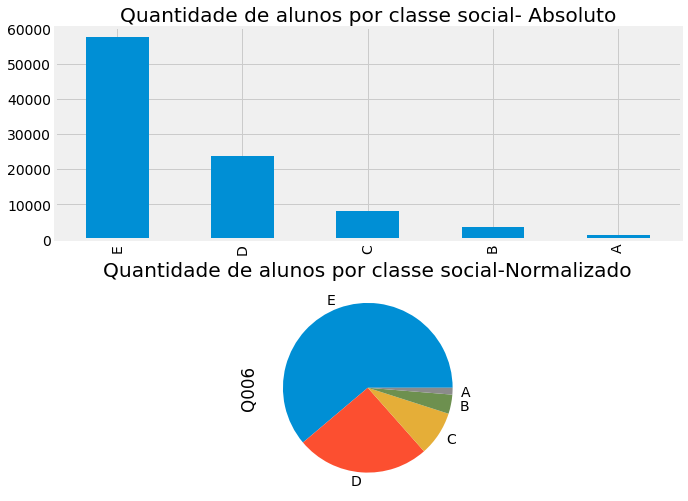

In [ ]:
import matplotlib.style as stl
bars = dados_sem_zero_classe["Q006"].unique()
bars.sort()

print(dados_sem_zero_classe["Q006"].value_counts(normalize=True))
print(dados_sem_zero_classe["Q006"].value_counts())
stl.use('fivethirtyeight')
plt.figure(facecolor="White")

plt.subplot(2,1,1)
plt.title("Quantidade de alunos por classe social- Absoluto")
dados_sem_zero_classe["Q006"].value_counts().plot.bar(figsize=(15,8))
plt.show

plt.subplot(2,1,2)
plt.title("Quantidade de alunos por classe social-Normalizado")
dados_sem_zero_classe["Q006"].value_counts(normalize=True).plot.pie(figsize=(10,8))
plt.show

Como a ideia proposta pela Alura é apenas demonstrar análise. Vou tomar esta amostra como representativa da base de dados. (Gente desculpa nao dá tempo de analisar a base toda pq senao nao tem Pc que aguenta)

Analisaremos neste momento os resultados das notas totais dos alunos de acordo com sua classe social. Interessantemente,mesmo a classe E tendo 51 vezes a quantidade de alunos da Classe A, a maior nota dentro do IQR da classe E ainda é menor que o limite inferior (Q1) da Classe A. Contudo os Outliers da Classe E sobrepõe-se a maior nota da Classe A, que nao tem outliers superiores.

Outro fator que chama atenção entre os extremos são os outliers inferiores da classe A com algumas notas inferiores à das outlirs inferiores das outras classes mas sobrepondo-se após um ponto, mas nao ficando tão baixa quanto as demais.




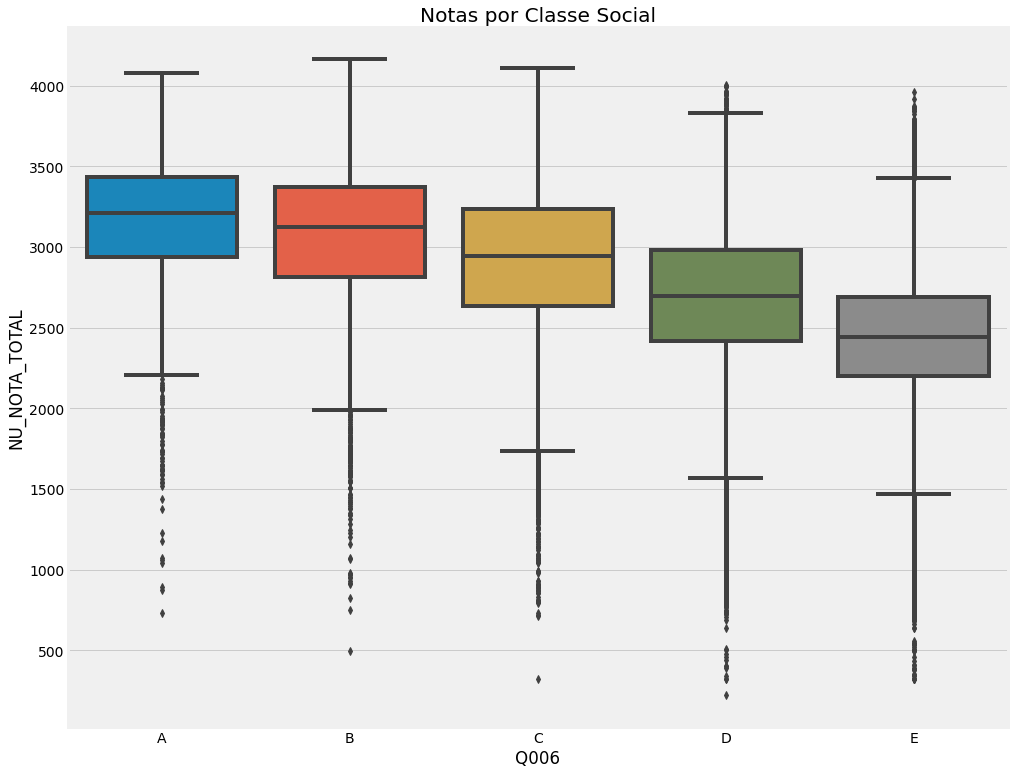

In [ ]:
from scipy import stats
plt.figure(figsize=(15,12), facecolor="White")
plt.title("Notas por Classe Social")

sns.boxplot(x="Q006", y="NU_NOTA_TOTAL", data=dados_sem_zero_classe, order=bars)


Visualmente, os outliars superiorres da classe E é acima de 3000 e os inferiores abaixo de 1500.
Vamos calcular os outliers e plotar um histograma para confirmação quantitativa

In [ ]:

#a proposta inicial é verificar a quantidade de outliers e como os seus dados médios se comportam frente a média das demais classes
######################CLASSE E##################################################

classe_e=dados_sem_zero_classe.query("Q006 =='E'")
#calculando os elementos de análise do boxplot e seus limites máximos e mínimos

#Quantiles superior (Q3) e inferior (Q1) e o Interquarltile Range (IQR)
q1_e=classe_e["NU_NOTA_TOTAL"].quantile(0.25)
q3_e=classe_e["NU_NOTA_TOTAL"].quantile(0.75)
iqr_e=q3_e-q1_e

#calculando os valores das notas
classe_e_max = q3_e +1.5*iqr_e
classe_e_min = q1_e -1.5*iqr_e


#criando os dfda frames de outliers
xp=np.array(classe_e['NU_NOTA_TOTAL'] )
max_out_e=np.where( xp > classe_e_max)
min_out_e=np.where( xp <  classe_e_min)

 
classe_e_outl_sup= classe_e.iloc[max_out_e]
classe_e_outl_inf= classe_e.iloc[min_out_e]
#


In [ ]:
######################CLASSE A##################################################
classe_a=dados_sem_zero_classe.query("Q006 =='A'")

#calculando os elementos de análise do boxplot e seus limites máximos e mínimos

#Quantiles superior (Q3) e inferior (Q1) e o Interquarltile Range (IQR)
q1_a=classe_a["NU_NOTA_TOTAL"].quantile(0.25)
q3_a=classe_a["NU_NOTA_TOTAL"].quantile(0.75)
iqr_a=q3_a-q1_a

#calculando os valores das notas
classe_a_max = q3_a +1.5*iqr_a
classe_a_min = q1_a -1.5*iqr_a


#criando os dfda frames de outliers
xp=np.array(classe_a['NU_NOTA_TOTAL'] )
max_out_a=np.where( xp<classe_a_min)
normal_a=np.where(xp>classe_a_min)

classe_a_outl_inf= classe_a.iloc[max_out_a]
classe_a_sem_out = classe_a.iloc[normal_a] #será utilizado para remover os outliers inferiores do aluno médio abaixo

In [ ]:
#já que estamos por aqui vou criar o perfil médio dos alunos para 
#análises vindouras

#criando os alunos médios para fins de comparação
aluno_E_medio_alto= classe_e_outl_sup[provas].mean()
aluno_E_medio_alto= aluno_E_medio_alto.to_numpy()

aluno_E_medio_baixo= classe_e_outl_inf[provas].mean()
aluno_E_medio_baixo= aluno_E_medio_baixo.to_numpy()

#criando alunos médios normais e outliers inferiores
aluno_a_medio_inf= classe_a_outl_inf[provas].mean()
aluno_a_medio_inf= aluno_a_medio_inf.to_numpy()

aluno_a_medio= classe_a_sem_out[provas].mean()
aluno_a_medio= aluno_a_medio.to_numpy()



Text(0.5, 1.0, "Histograma de Notas Totais do aluno médio classe 'A' e outlier superior medio classe 'E'")

<Figure size 576x576 with 0 Axes>

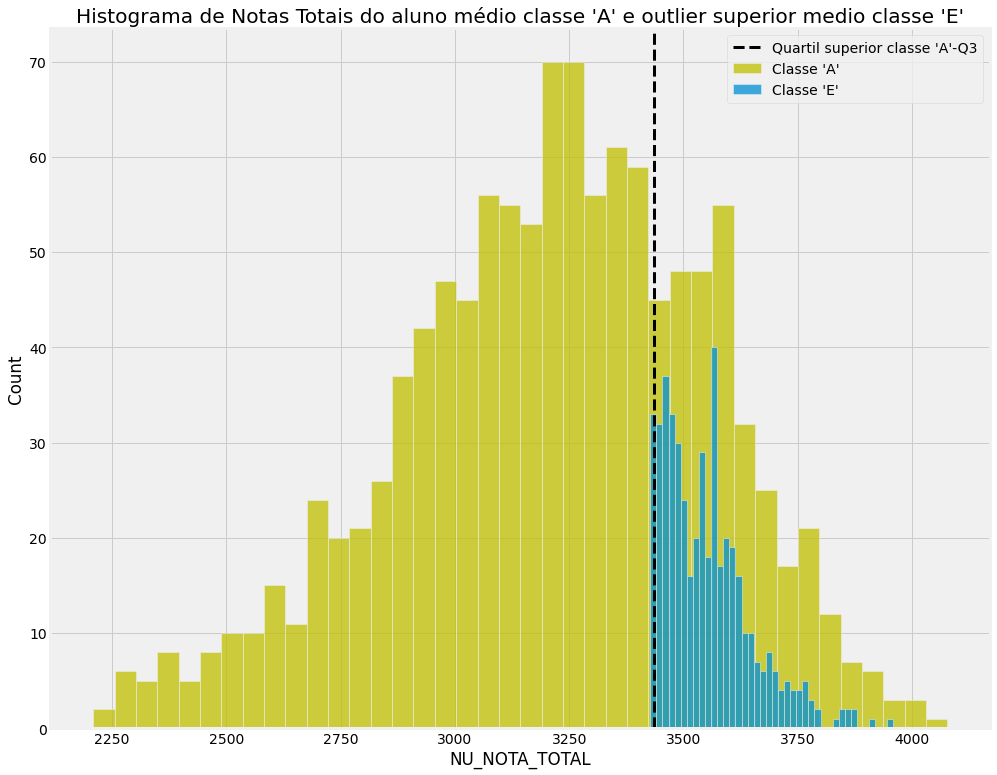

In [ ]:
#após estes singelos cálculos podemos ter a confirmação quantitativa da
# hipótese

plt.figure(figsize=(8,8))
plt.figure(figsize=(15,12), facecolor="White")
stl.use('fivethirtyeight')

sns.histplot(classe_a_sem_out, x = "NU_NOTA_TOTAL", color='y', label="Classe 'A'", bins=40)
sns.histplot(classe_e_outl_sup, x = "NU_NOTA_TOTAL", label ="Classe 'E'", bins=40)

plt.axvline(q3_a, color='k', linestyle='dashed', linewidth=3, Label="Quartil superior classe 'A'-Q3")
plt.legend()
plt.title("Histograma de Notas Totais do aluno médio classe 'A' e outlier superior medio classe 'E'")

Pelo que se pode perceber, realmente houve um grupo dentro da classe E que perfomou tão bem quanto os alunos da classe A.

Adiante vamos avaliar o aluno médio dos dois grupos.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<Figure size 1080x864 with 0 Axes>

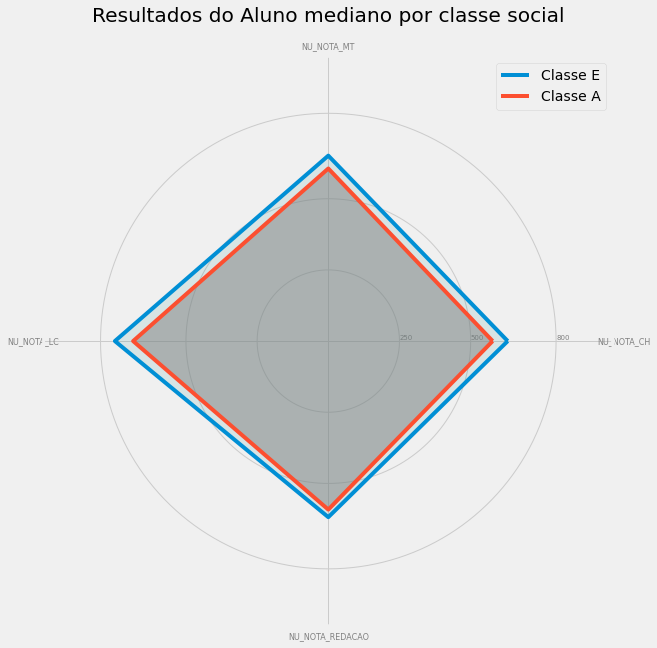

In [ ]:
#spider chart oulier superior classe E
from math import pi

plt.figure(figsize=(15,12), facecolor="White")
stl.use('fivethirtyeight')
plt.figure(figsize=(20,10))
plt.subplot(1,2,1, polar=True)

# number of variable
categories=list(classe_e_outl_sup[provas])[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values = aluno_E_medio_alto
values[4]= values[0]

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(121, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([250,500,800], ["250","500","800"], color="grey", size=7)
plt.ylim(0,1000)
 
# Plot data
ax.plot(angles, values, label="Classe E")

 
# Fill area
ax.fill(angles, values, 'teal', alpha=0.1)


################# Classe A######################################

# número de variáveis
categories=list(classe_a_sem_out[provas])[1:]
N = len(categories)
 
# valores para inserir no gráfico
values = aluno_a_medio
values[4]= values[0] #seto mais uma coluna com o valor inicial para fechar a figura geométrica

# ângulos das entradas no gráfico
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax1 = plt.subplot(121, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax1.set_rlabel_position(0)
plt.yticks([250,500,800], ["250","500","800"], color="grey", size=7)
plt.ylim(0,1000)
 
# Plot data
ax1.plot(angles, values, label="Classe A")
 
# Fill area
ax1.fill(angles, values, 'grey', alpha=0.5)
plt.title("Resultados do Aluno mediano por classe social")
plt.legend()

O grupo médio da classe E tem 467 amostras, enquanto o Classe A sem outleirs inferior tem 1145 amostras. Mesmo assim verifica-se que as notas do aluno mediano da classe E é maior que a classe A.

Em seguida vamos avaliar os shapes do interrelacionamento das provas e suas correlações

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

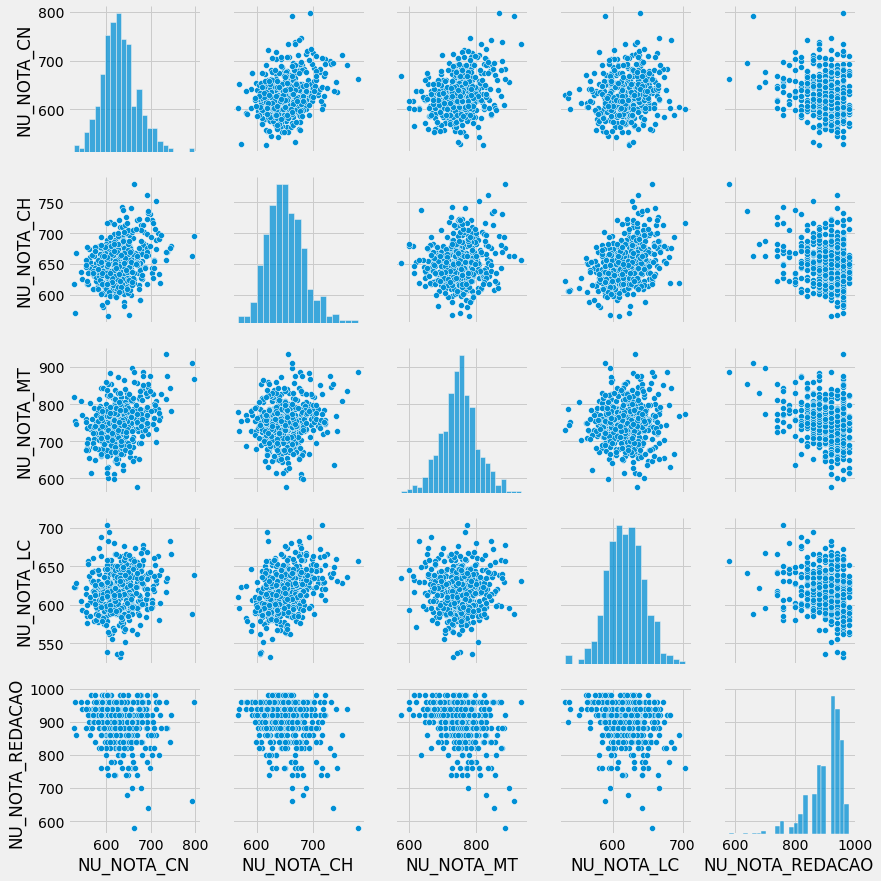

In [ ]:
plt.figure(facecolor="White")
stl.use('fivethirtyeight')
plt.figure(clear=True)
sns.pairplot(classe_e_outl_sup[provas])

Text(0.5, 1.0, 'Correlação Classe A')

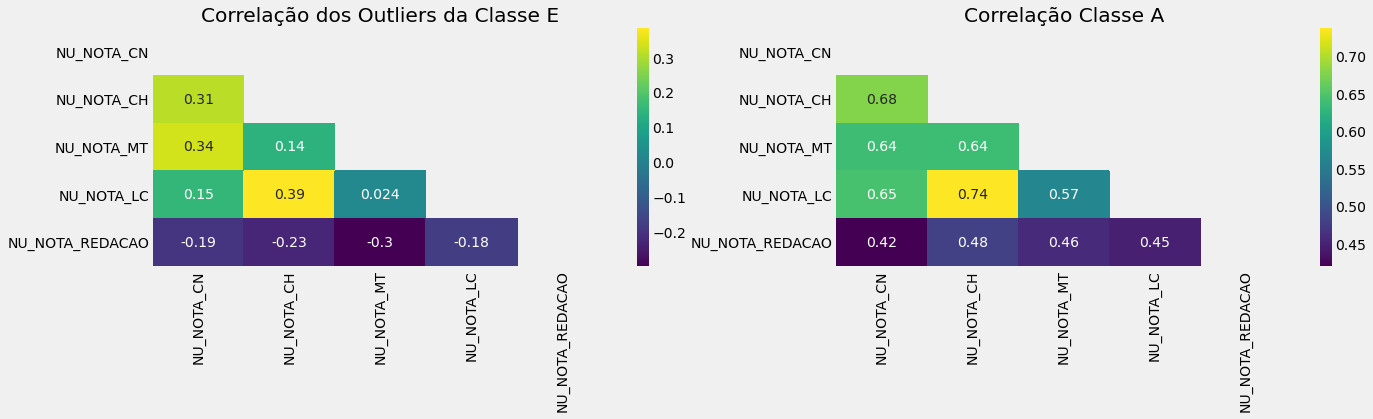

In [ ]:
plt.figure(figsize=(20,9))
plt.subplot(2, 2, 1)
df_provas = classe_e_outl_sup[provas]
matrix = np.triu(df_provas.corr())
sns.heatmap(df_provas.corr(), cmap='viridis', annot=True, mask=matrix)
plt.title("Correlação dos Outliers da Classe E")

plt.subplot(2, 2, 2)
df_provas = classe_a[provas]
matrix = np.triu(df_provas.corr())
sns.heatmap(df_provas.corr(), cmap='viridis', annot=True, mask=matrix)
plt.title("Correlação Classe A")

Como pode ser vertificado não há correlação NENHUMA entre as notas da prova no grupo de outliers, no quesito Redação, inclusive verifica-se que á correlação negativa, ou seja, quanto maio as notas nas outras matérias menor é a nota em redação. Porém é possivel verificar que a correlação entre LC e CH ainda é a mais forte da matriz.

Conforme verifica-seno pairplot as provas, com excessão da redação, acompanham a curva normal, o que implica uma distribuilão simétrica das notas. A nota de redação tem uforte inclinação à direita (o que explica a correlação negativa).

De modo que a partir deste ponto vale a pena verificar os aspectos sociais do grupo em questão

Text(0.5, 1.0, 'Idadade dos outlires da classe E com a situaçaop e conclusão')

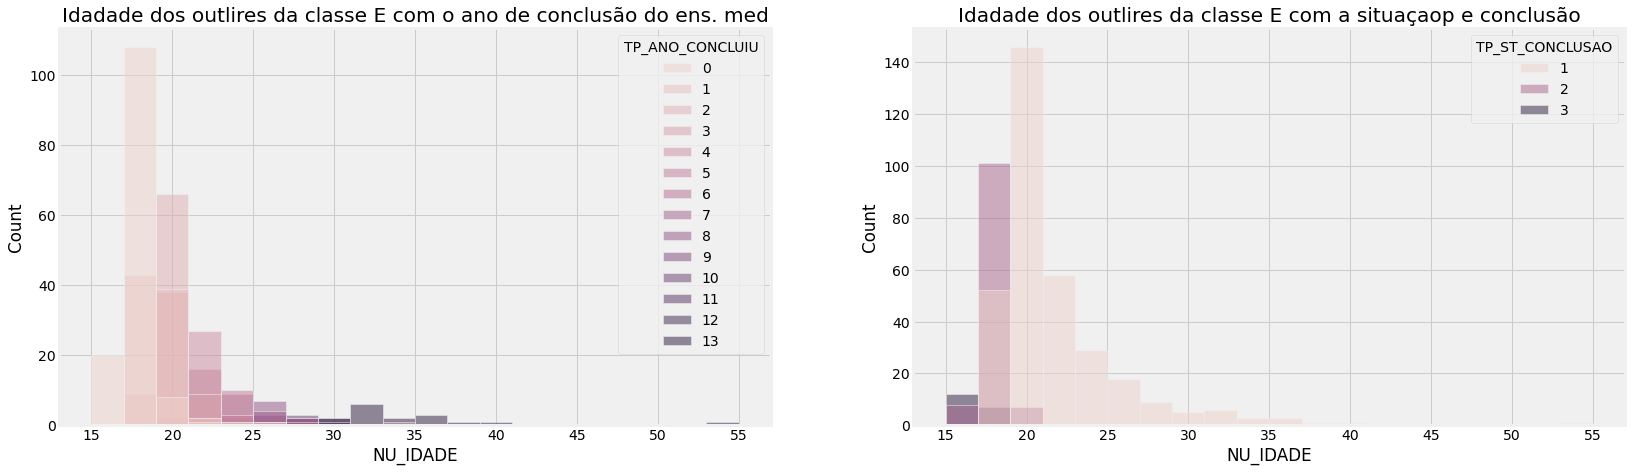

In [ ]:
plt.figure(facecolor="White", figsize=(25,15))
stl.use('fivethirtyeight')

plt.subplot(2, 2, 1)
sns.histplot(classe_e_outl_sup, hue="TP_ANO_CONCLUIU", x = "NU_IDADE", color='b', bins=20)
plt.title("Idadade dos outlires da classe E com o ano de conclusão do ens. med")

plt.subplot(2, 2, 2)

sns.histplot(classe_e_outl_sup, hue="TP_ST_CONCLUSAO", x = "NU_IDADE", color='b', bins=20)
plt.title("Idadade dos outlires da classe E com a situaçaop e conclusão")



Os dados acima indica que o perfil do nosso outliers da classe E são pessoas mais velhas que já findaram os estudos à alguns anos (zero é quem nao informou do 1 ao 13 os valores decrescem um ano a partir de 2018). Há uma participação de alunos por terminar o Ensino médio em 2020, são impactantes mas nao o principal do grupo.

Vejamos o acesso à internet deste grupo:


Text(0.5, 1.0, 'Outliers Classe E com internet por nota total')

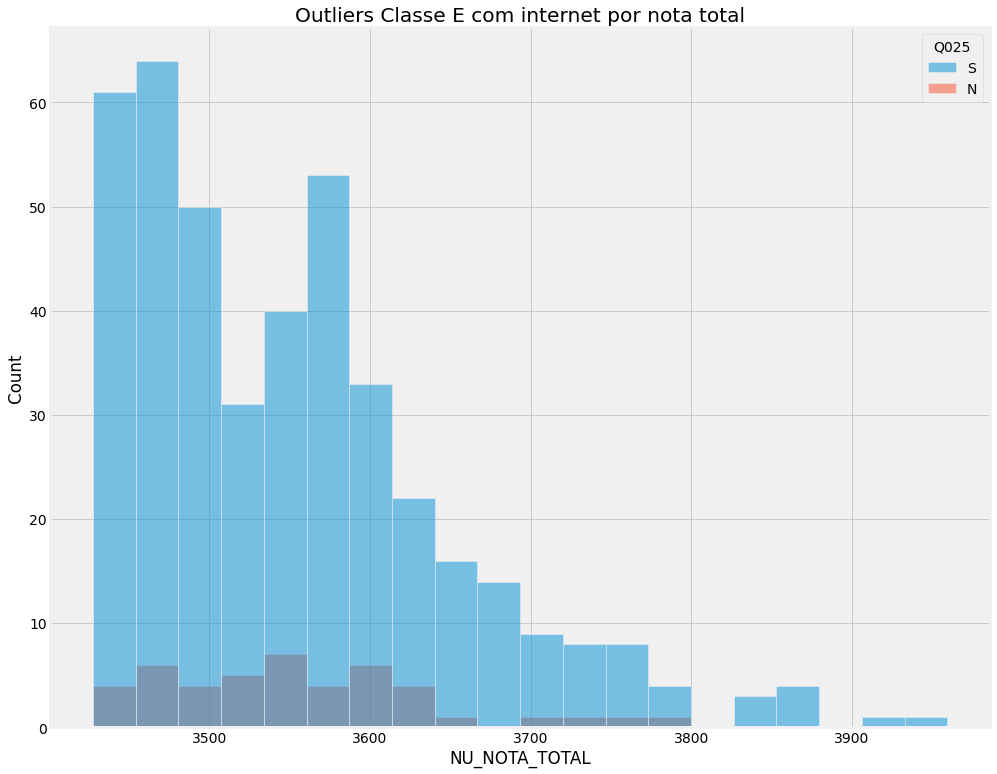

In [ ]:
#antes disso vamos tornar a informação mais apalatével
for index, row in classe_e_outl_sup.iterrows():
  if row["Q025"] == 'A': 
     classe_e_outl_sup.loc[index,'Q025'] = 'N'
  else:
     classe_e_outl_sup.loc[index,'Q025'] = 'S'
plt.figure(figsize=(15,12), facecolor="White")
stl.use('fivethirtyeight')
sns.histplot(classe_e_outl_sup, hue="Q025", x = "NU_NOTA_TOTAL", color='b', label="Classe E", bins=20)
plt.title("Outliers Classe E com internet por nota total")

Verifica-se que a imensa maioria dos alunos tem acesso à internet. Para aprofundar neste assunto seria necessário a informação de quanto tempo eles fizeram uso da rede para estudar, e como. Contudo nao foi possível localizar esta informação de forma atualizada. Fica aqui uma oportunidade de aprofundamento.

Também é possivel verificar que a partida da nota ~3650 somente consegui notas melhores quem teve acesso à internet.

Os demais que conseguiram notas altas sem internet são irrisórios para fins de análise.

Vejamos alguns quesitos socio-ecomicos

Text(0.5, 1.0, 'Ocupação mãe')

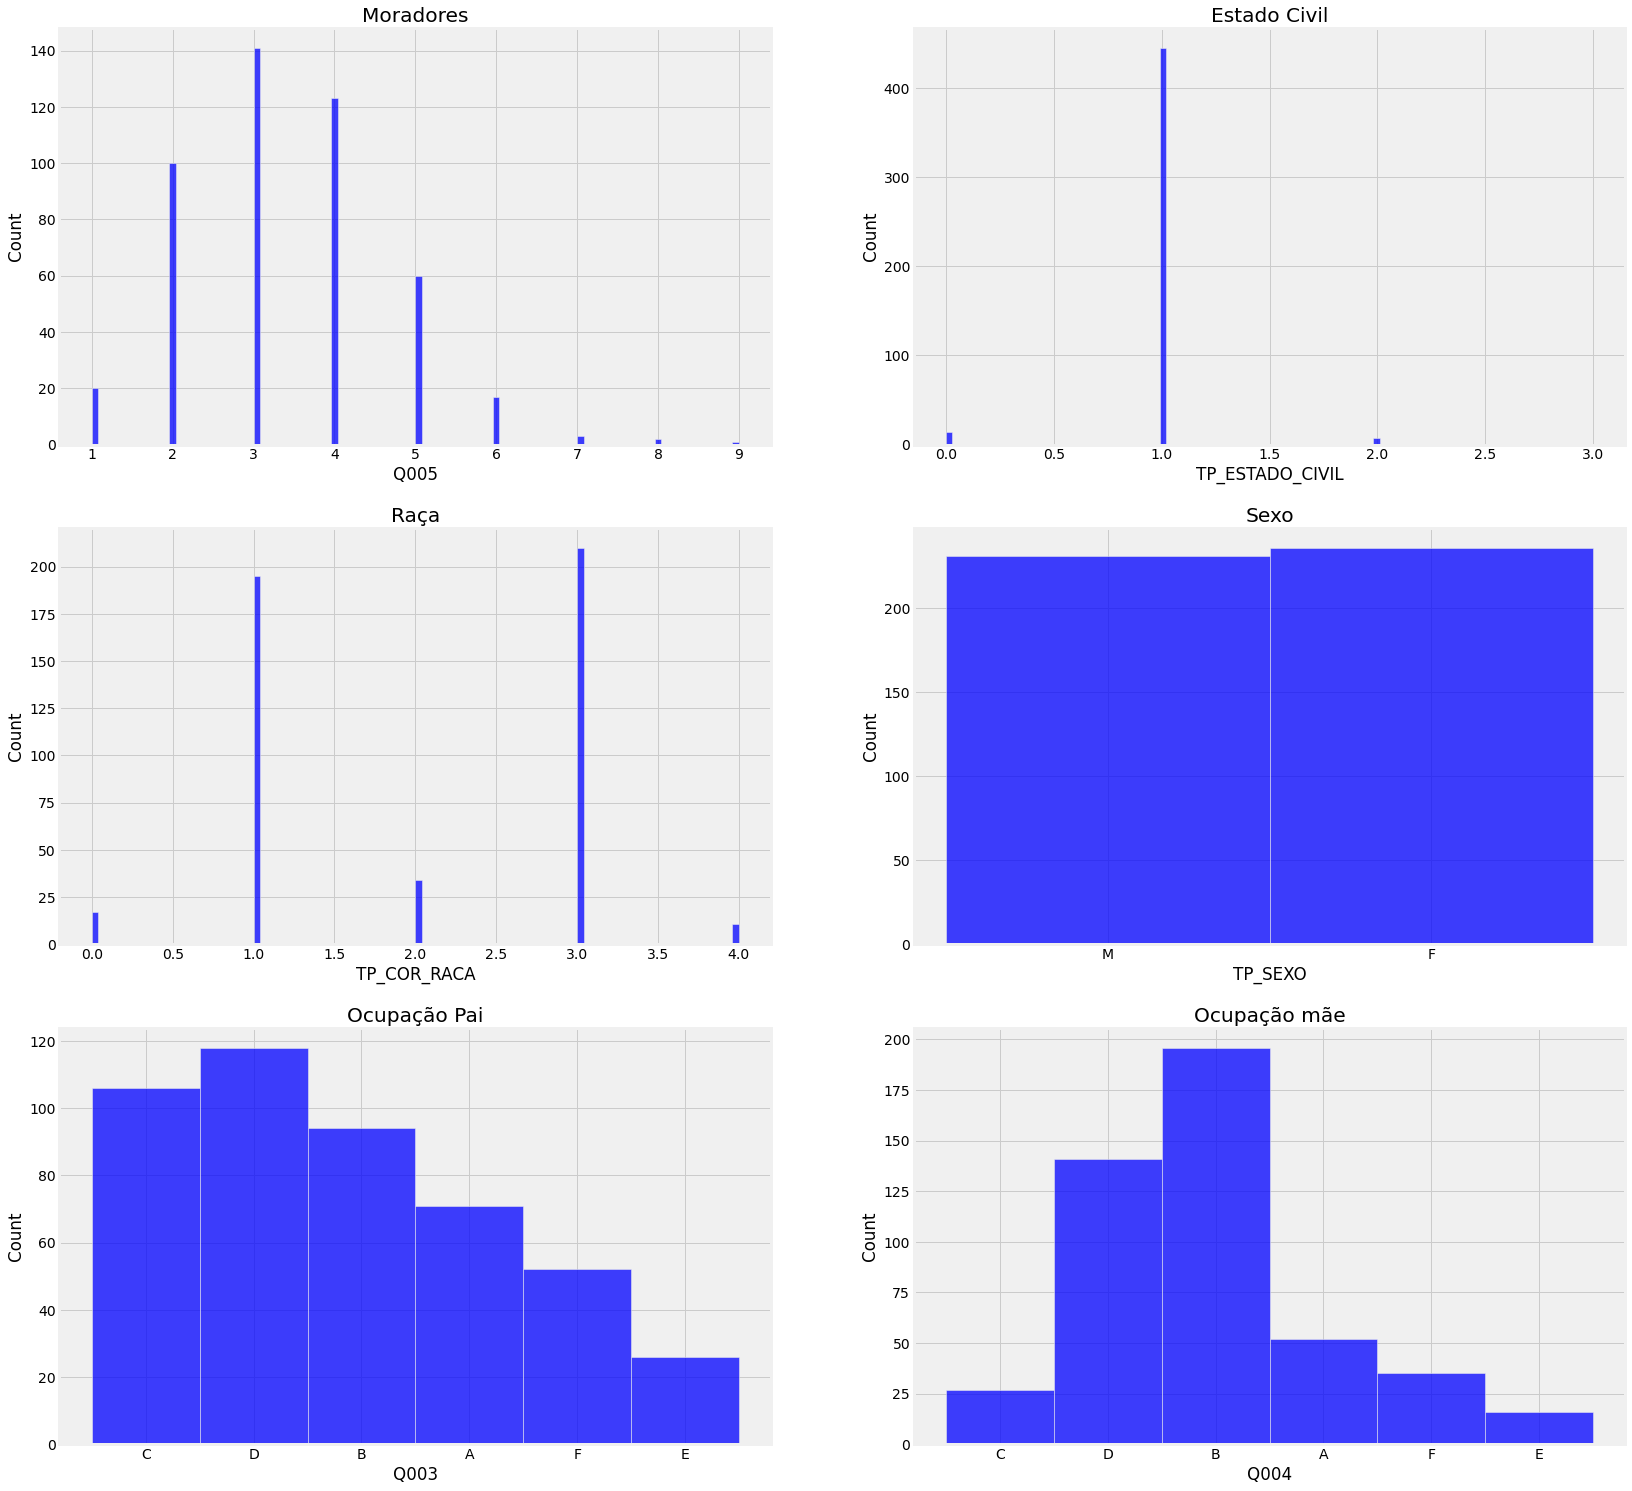

In [ ]:
plt.figure(figsize=(25,50), facecolor="White")
stl.use('fivethirtyeight')

plt.subplot(6, 2, 1)
sns.histplot(classe_e_outl_sup, x = "Q005", color='b', bins=100)
plt.title("Moradores")

plt.subplot(6, 2, 2)
sns.histplot(classe_e_outl_sup, x = "TP_ESTADO_CIVIL", color='b', bins=100)
plt.title("Estado Civil")

plt.subplot(6, 2, 3)
sns.histplot(classe_e_outl_sup, x = "TP_COR_RACA", color='b', bins=100)
plt.title("Raça")

plt.subplot(6, 2, 4)
sns.histplot(classe_e_outl_sup, x = "TP_SEXO", color='b', bins=100)
plt.title("Sexo")

plt.subplot(6, 2, 5)
sns.histplot(classe_e_outl_sup, x = "Q003", color='b', bins=100)
plt.title("Ocupação Pai")

plt.subplot(6, 2, 6)
sns.histplot(classe_e_outl_sup, x = "Q004", color='b', bins=100)
plt.title("Ocupação mãe")

Pelos dados acima percebe-se que o perfil do outlier da classe E é uma pessoa solteira, branca ou parda que mora, provavelmente com a família. Pelaocupação percebe-se participação dos grupos que recebem salário mímino, porém ha ruido nos dados pois a letra E trata de cargos com salários mais altos, indicando ruído nos dados. Passemos aos da Classe A agora

Text(0.5, 1.0, 'Ocupação mãe')

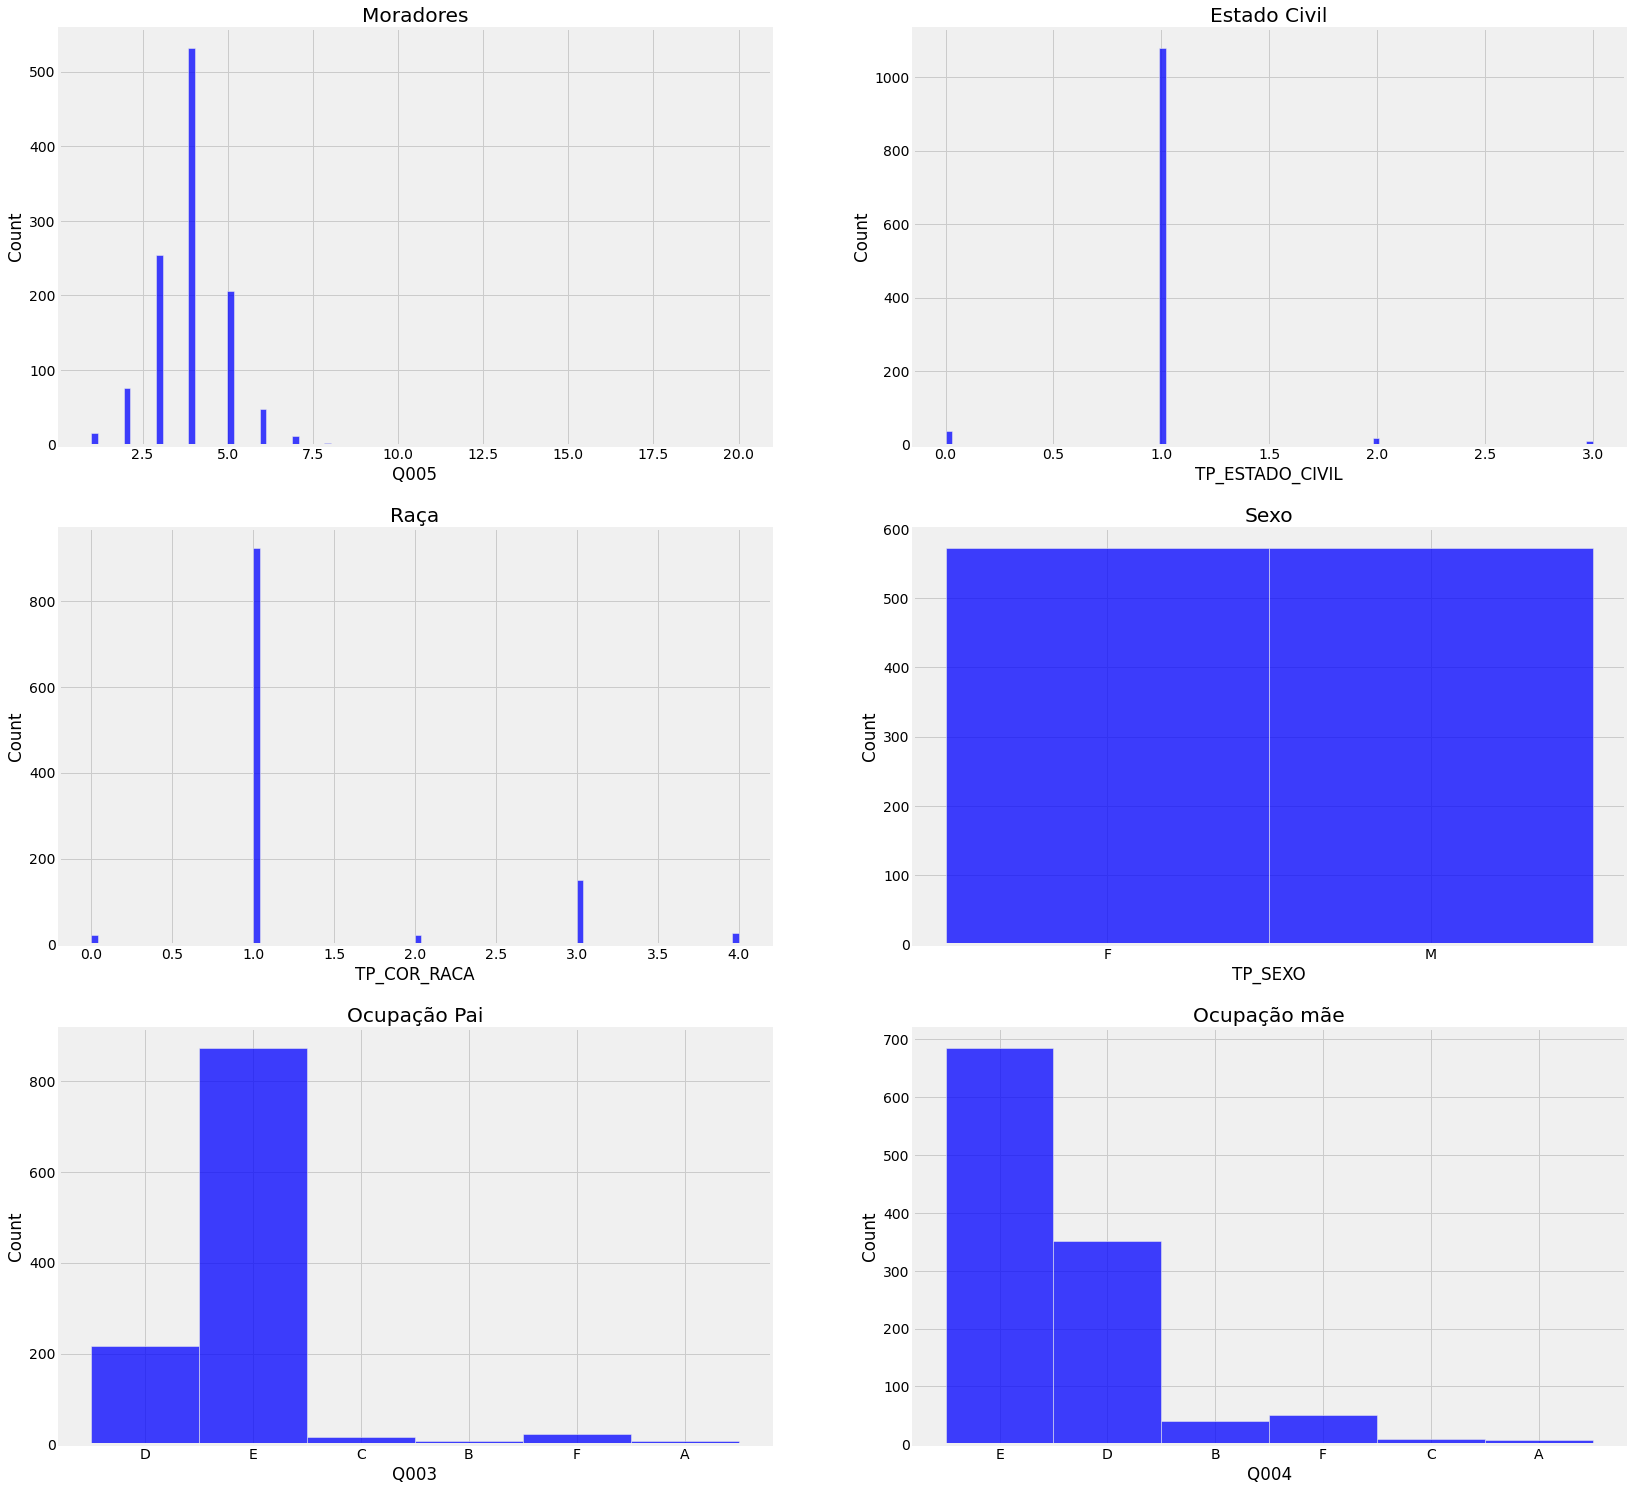

In [ ]:
plt.figure(figsize=(25,50), facecolor="White")
stl.use('fivethirtyeight')

plt.subplot(6, 2, 1)
sns.histplot(classe_a_sem_out, x = "Q005", color='b', bins=100)
plt.title("Moradores")

plt.subplot(6, 2, 2)
sns.histplot(classe_a_sem_out, x = "TP_ESTADO_CIVIL", color='b', bins=100)
plt.title("Estado Civil")

plt.subplot(6, 2, 3)
sns.histplot(classe_a_sem_out, x = "TP_COR_RACA", color='b', bins=100)
plt.title("Raça")

plt.subplot(6, 2, 4)
sns.histplot(classe_a_sem_out, x = "TP_SEXO", color='b', bins=100)
plt.title("Sexo")

plt.subplot(6, 2, 5)
sns.histplot(classe_a_sem_out, x = "Q003", color='b', bins=100)
plt.title("Ocupação Pai")

plt.subplot(6, 2, 6)
sns.histplot(classe_a_sem_out, x = "Q004", color='b', bins=100)
plt.title("Ocupação mãe")

Text(0.5, 1.0, 'Idadade dos outlires da classe E com a situaçaop e conclusão')

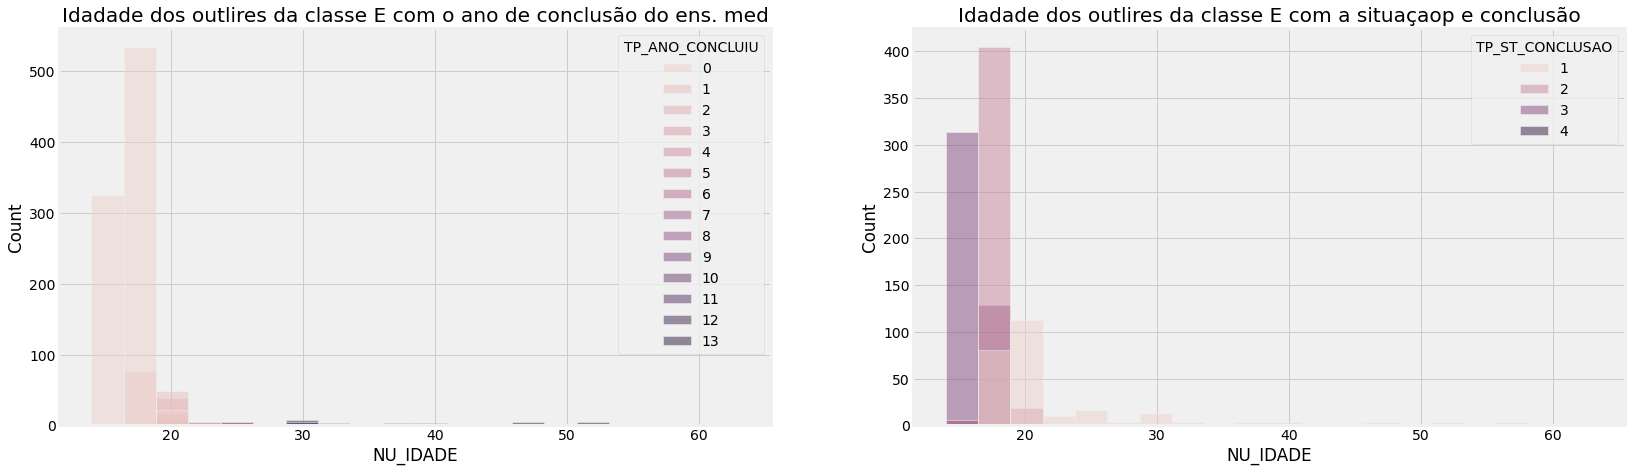

In [ ]:
plt.figure(facecolor="White", figsize=(25,15))
stl.use('fivethirtyeight')

plt.subplot(2, 2, 1)
sns.histplot(classe_a_sem_out, hue="TP_ANO_CONCLUIU", x = "NU_IDADE", color='b', bins=20)
plt.title("Idadade dos outlires da classe E com o ano de conclusão do ens. med")

plt.subplot(2, 2, 2)

sns.histplot(classe_a_sem_out, hue="TP_ST_CONCLUSAO", x = "NU_IDADE", color='b', bins=20)
plt.title("Idadade dos outlires da classe E com a situaçaop e conclusão")

Os dados indicam que o candidato está na idade escolar e é menor de idade, em sua gande maioria branco, obviamente solteiros onde os pais ocupam cargos de nível superior. De fato estes dados refletem o que outras pesquisa já dizem sobre o perfil da classe alta brasileira.

#CONCLUSÃO

De fato os outliers da classe E apresentam um perfil também disperso do candidato usual da prova. Pois são pessoas mais velhas que provavelemente, por terem interesse nos estudos reforçados pela necessidade de melhoria das condições de vida através de um emprego melhor pela formação. Isso aliado à mais tempo de estudo faz com que eles consigam atingir resultados melhores dentro do seu grupo.

Não há nenhuma relação específica para que este grupo popssa contribuir com os demais indivíduos da classe. A não ser que eles provavelmente sentem a importância dos estudos e se dediquem mais.

Ademais este levantamento somente deixou mais evidente a já conhecida discrepância entre as classes sociais brasileiras, dexando este que vos fala com esta cara após ficar até o final do prazo para concluir o óbvio e nao ter encontrado uma pérola onde ninguem:
[gumball face](https://static.wikia.nocookie.net/9339e67a-bf73-4940-a41b-a7199c895dd6)
